In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
input_dir = r'./input/'
output_dir = r'./output/'

In [18]:
dfa = pd.read_excel(output_dir+"NHANES_1999-2000.xlsx")
dfb = pd.read_excel(output_dir+"NHANES_2001-2002.xlsx")
dfc = pd.read_excel(output_dir+"NHANES_2003-2004.xlsx")
dfd = pd.read_excel(output_dir+"NHANES_2005-2006.xlsx")
dfe = pd.read_excel(output_dir+"NHANES_2007-2008.xlsx")
dff = pd.read_excel(output_dir+"NHANES_2009-2010.xlsx")
dfg = pd.read_excel(output_dir+"NHANES_2011-2012.xlsx")
dfh = pd.read_excel(output_dir+"NHANES_2015-2016.xlsx")
dfi = pd.read_excel(output_dir+"NHANES_2017-2018.xlsx")

In [36]:
dfV = pd.concat([dfa, dfb, dfc, dfd, dfe, dff, dfg, dfh, dfi], ignore_index=True).iloc[:, 1:]
dfV.shape

(6421, 21)

In [37]:
dfV.head()

,SEQN,RIAGENDR,RIDAGEYR,Military,AUXU500R,AUXU1K2R,AUXU2KR,AUXU3KR,AUXU4KR,AUXU6KR,...,AUXU500L,AUXU1K2L,AUXU2KL,AUXU3KL,AUXU4KL,AUXU6KL,AUXU8KL,Q1,Q2,Q3
0,57,1,3,2,45,20,30,40,45,50,...,-5,5,15,10,5,10,25,1,2,2
1,126,2,2,2,15,15,30,40,40,25,...,15,10,20,25,20,35,25,1,1,1
2,130,1,5,2,25,15,5,25,80,100,...,30,30,45,70,100,100,120,2,1,1
3,150,1,5,2,10,35,65,70,90,120,...,15,25,35,35,55,55,55,2,2,2
4,162,1,5,1,15,20,50,75,80,75,...,20,25,40,65,75,85,80,2,2,2


<Figure size 720x432 with 0 Axes>

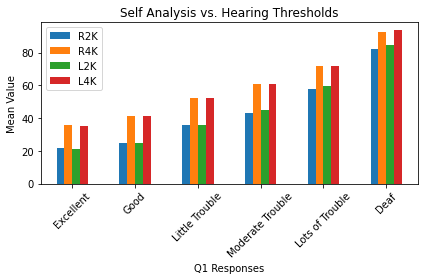

In [44]:
df1 = dfV[dfV['Q1'] == 1]
df2 = dfV[dfV['Q1'] == 2]
df3 = dfV[dfV['Q1'] == 3]
df4 = dfV[dfV['Q1'] == 4]
df5 = dfV[dfV['Q1'] == 5]
df6 = dfV[dfV['Q1'] == 6]

columns_to_compare = ['AUXU2KR', 'AUXU4KR', 'AUXU2KL', 'AUXU4KL']
column_names = ['R2K', 'R4K', 'L2K', 'L4K']
comparison_results = {}

for i in range(len(columns_to_compare)):
    comparison_results[column_names[i]] = {
        'Excellent': df1[columns_to_compare[i]].mean(),
        'Good': df2[columns_to_compare[i]].mean(),
        'Little Trouble': df3[columns_to_compare[i]].mean(),
        'Moderate Trouble': df4[columns_to_compare[i]].mean(),
        'Lots of Trouble': df5[columns_to_compare[i]].mean(),
        'Deaf': df6[columns_to_compare[i]].mean()
    }

compare = pd.DataFrame(comparison_results)

plt.figure(figsize=(10, 6))
compare.plot(kind='bar')
plt.title('Self Analysis vs. Hearing Thresholds')
plt.xlabel('Q1 Responses')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:
dfV = pd.read_csv(input_dir+"data_filtered.csv")
dfV.head()

,L500,L1k,L2k,L3k,L4k,L6k,L8k,R500,R1k,R2k,R3k,R4k,R6k,R8k,Gender,AgeGroup,Industry
0,25.0,20.0,15.0,20.0,35.0,25.0,15.0,20.0,20.0,10.0,15.0,40.0,30.0,30.0,1,3,671
1,10.0,10.0,10.0,35.0,50.0,30.0,10.0,10.0,10.0,5.0,30.0,35.0,25.0,20.0,1,4,671
2,15.0,15.0,5.0,15.0,45.0,30.0,20.0,15.0,15.0,5.0,40.0,50.0,20.0,5.0,1,3,671
3,30.0,20.0,25.0,60.0,60.0,60.0,30.0,25.0,20.0,35.0,65.0,65.0,70.0,50.0,1,5,671
4,15.0,5.0,10.0,55.0,60.0,75.0,75.0,15.0,5.0,20.0,65.0,65.0,75.0,80.0,1,5,671


<Figure size 1440x1152 with 0 Axes>

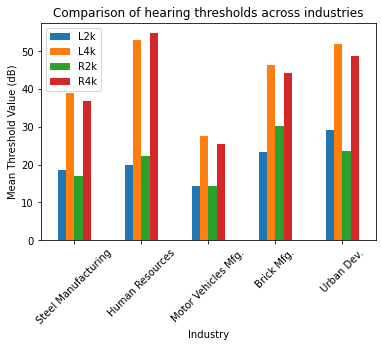

In [56]:
df1 = dfV[dfV['Industry'] == 671]
df2 = dfV[dfV['Industry'] == 7]
df3 = dfV[dfV['Industry'] == 41]
df4 = dfV[dfV['Industry'] == 140]
df5 = dfV[dfV['Industry'] == 9]
columns_to_compare = ['L2k', 'L4k', 'R2k', 'R4k']

comparison_results = {}

for column in columns_to_compare:
    comparison_results[column] = {
        'Steel Manufacturing': df1[column].mean(),
        'Human Resources': df2[column].mean(),
        'Motor Vehicles Mfg.': df3[column].mean(),
        'Brick Mfg.': df4[column].mean(),
        'Urban Dev.': df5[column].mean()
    }

compare = pd.DataFrame(comparison_results)

plt.figure(figsize=(20, 16))
compare.plot(kind='bar')
plt.title('Comparison of hearing thresholds across industries')
plt.xlabel('Industry')
plt.ylabel('Mean Threshold Value (dB)')
plt.xticks(rotation=45)
plt.show()